<font color='blue'>**Team 5:** Karthik Revappa Gouda Patil(kr35),  Swetha Pandiri (swethap2), Rakshita (rakshi2), Gamanash Kommineni (gk2), Vineet Ganti (vgant2)</font>

### **Installing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Data directly from Kaggle**

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import zipfile
os.environ['KAGGLE_USERNAME'] = 'swethapandiri15'
os.environ['KAGGLE_KEY'] = 'b97c7d4731d4ff7070793c3fcbfed6f2'

In [ ]:
os.makedirs('data', exist_ok=True)

!kaggle competitions download -c home-credit-default-risk

 99% 682M/688M [00:09<00:00, 73.3MB/s]
100% 688M/688M [00:09<00:00, 77.7MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the downloaded data
with zipfile.ZipFile('home-credit-default-risk.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

# Create a directory in your Google Drive
!mkdir -p '/content/drive/My Drive/DS-EDA'

# Copy the data to your Google Drive
!cp -r data '/content/drive/My Drive/DS-EDA'

### **Understanding Data**

In [ ]:
application_train = pd.read_csv('/content/drive/My Drive/DS-EDA/data/application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### **Question 1.** Get the count of unique values of SK_ID_CURR in file application_train.csv and compare this count to the number of rows in application_train.csv. Are they equal to each other? Is SK_ID_CURR the primary key of this table?


In [ ]:
application_train['SK_ID_CURR'].nunique()

307511

In [ ]:
len(application_train)

307511

**Inference:** Since all the values in the SK_ID_CURR column are unique and equal to the total number of rows (No Nulls), we can consider this column as the Primary Key

### **Question 2.** Examine the TARGET column of file application_train.csv. What are the unique values in this column? Print the count and proportions of each possible value in the target column. (Hint: value_counts()). Is the dataset balanced?

In [ ]:
target_count =pd.DataFrame(application_train['TARGET'].value_counts())
target_count

,TARGET
0,282686
1,24825


In [ ]:
target_count.iloc[:]/ target_count['TARGET'].sum() * 100

,TARGET
0,91.927118
1,8.072882


**Inference:** Since the count for client with payment difficulties (1) is approx. 8% and all other cases (0) is approx. 91%, we can say that the dataset is not balanced

### **Question 3**.Generate a Pearson correlation matrix and heatmap (for any 10 numeric variables of choice) on application_tain.csv. Write code to list the top 5 features correlated with the TARGET column. (Hint: df.corr())

In [ ]:
num_col= application_train.select_dtypes(['float64', 'int64'])

In [ ]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 106 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41)
memory usage: 248.7 MB


In [ ]:
#num_vars['TARGET']= application_train['TARGET']
num_col

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


 **Pearson Correlation Matrix**

In [ ]:
pearson_data= num_col.corr(method= 'pearson').sort_values(by='TARGET', ascending=False)
pearson_data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
REGION_RATING_CLIENT_W_CITY,-0.001138,0.060893,0.024781,-0.091735,-0.110915,-0.141682,-0.112208,-0.531535,0.008073,0.034624,...,-0.013672,-0.001530,0.002609,-0.001501,0.006239,-0.001953,0.001102,-0.067741,0.004773,0.010683
REGION_RATING_CLIENT,-0.001075,0.058899,0.025423,-0.085465,-0.101776,-0.128525,-0.103786,-0.532877,0.009361,0.032750,...,-0.012532,-0.001205,0.002217,-0.001887,0.006312,-0.002241,0.001683,-0.069712,0.005436,0.011494
DAYS_LAST_PHONE_CHANGE,-0.000858,0.055218,-0.005865,-0.018585,-0.073701,-0.063747,-0.076313,-0.044013,0.082939,0.023032,...,0.047604,0.006852,0.009171,0.009826,-0.000858,0.002337,-0.003495,-0.041244,-0.001451,-0.112725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLOORSMAX_AVG,0.004851,-0.044003,-0.009705,0.060171,0.103296,0.130174,0.108512,0.322652,0.001634,-0.015970,...,0.012230,0.000900,-0.002702,-0.005814,0.003101,0.002946,-0.000050,0.046762,-0.000841,-0.019750
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988
EXT_SOURCE_1,0.000082,-0.155317,-0.138470,0.026232,0.168429,0.119398,0.175502,0.099997,-0.600610,0.289848,...,-0.025739,0.005131,-0.005102,-0.019208,-0.003963,-0.005087,-0.001801,0.030820,-0.003631,0.006562
EXT_SOURCE_2,0.002342,-0.160472,-0.018015,0.060925,0.131228,0.125804,0.139367,0.198924,-0.091996,-0.020767,...,0.001874,0.003256,0.000614,-0.007236,-0.004077,0.000553,0.001507,0.051981,-0.002849,-0.021984


Getting top 10 correlated columns

In [ ]:
pearson_final= pearson_data.iloc[:11,:11].round(2)
pearson_final

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
TARGET,-0.0,1.00,0.02,-0.00,-0.03,-0.01,-0.04,-0.04,0.08,-0.04,0.04
DAYS_BIRTH,-0.0,0.08,0.33,0.03,-0.06,0.01,-0.05,-0.03,1.00,-0.62,0.33
REGION_RATING_CLIENT_W_CITY,-0.0,0.06,0.02,-0.09,-0.11,-0.14,-0.11,-0.53,0.01,0.03,0.07
REGION_RATING_CLIENT,-0.0,0.06,0.03,-0.09,-0.10,-0.13,-0.10,-0.53,0.01,0.03,0.08
DAYS_LAST_PHONE_CHANGE,-0.0,0.06,-0.01,-0.02,-0.07,-0.06,-0.08,-0.04,0.08,0.02,0.06
DAYS_ID_PUBLISH,-0.0,0.05,-0.03,0.01,-0.01,0.01,-0.01,-0.00,0.27,-0.27,0.10
REG_CITY_NOT_WORK_CITY,-0.0,0.05,0.07,0.01,-0.02,0.00,-0.02,-0.04,0.24,-0.25,0.10
FLAG_EMP_PHONE,-0.0,0.05,0.24,0.06,0.07,0.10,0.06,0.00,0.62,-1.00,0.21
REG_CITY_NOT_LIVE_CITY,-0.0,0.04,0.02,0.00,-0.03,-0.01,-0.03,-0.05,0.18,-0.09,0.06
FLAG_DOCUMENT_3,-0.0,0.04,0.06,-0.02,0.10,0.10,0.07,-0.08,0.11,-0.25,0.03


**HEAT MAP of the top 10 numeric variables**

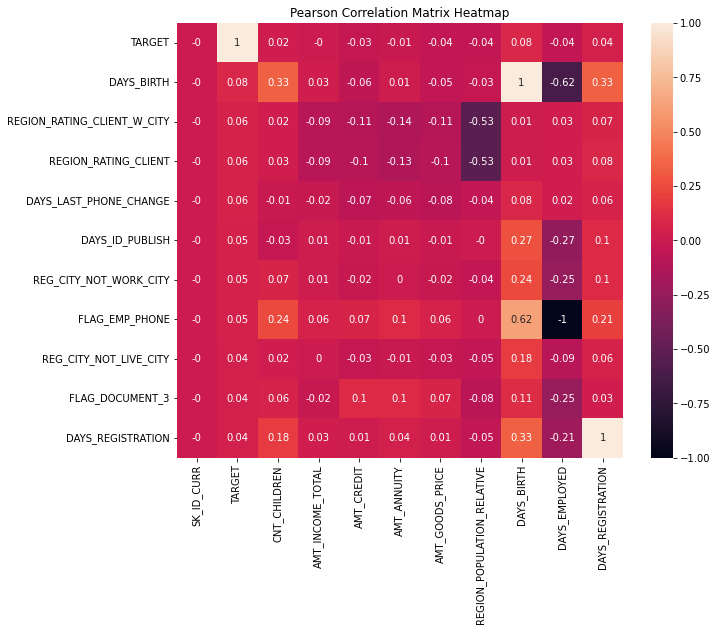

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pearson_final, annot = True, ax=ax)

# Set plot title
ax.set_title('Pearson Correlation Matrix Heatmap')

# Show plot
plt.show()

Getting the top 5 correlated numeric features

In [ ]:
pearson_top5= pearson_final.iloc[:,:2]
pearson_top5.head(6)

,SK_ID_CURR,TARGET
TARGET,-0.0,1.00
DAYS_BIRTH,-0.0,0.08
REGION_RATING_CLIENT_W_CITY,-0.0,0.06
REGION_RATING_CLIENT,-0.0,0.06
DAYS_LAST_PHONE_CHANGE,-0.0,0.06
DAYS_ID_PUBLISH,-0.0,0.05


**Inference:** Hence, the top 5 correlated columns and their percentage of correlation is as follows:


1.   DAYS_BIRTH :8%
2.   REGION_RATING_CLIENT_W_CITY: 6%
3.   REGION_RATING_CLIENT: 6%
4.   DAYS_LAST_PHONE_CHANGE: 6%
5.   DAYS_ID_PUBLISH: 5%








### **Question 4:** Generate histograms for any five numerical features in application_train.csv, and comment on whether they seem Gaussian, or have severe skews. Visualize the relationship between each of these numeric variables and the target variable. Also, comment on the presence of outliers on each variable.
 

In [ ]:
df_dist= application_train[['AMT_INCOME_TOTAL','AMT_CREDIT','CNT_FAM_MEMBERS','DAYS_REGISTRATION','AMT_ANNUITY']]
df_dist.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,DAYS_REGISTRATION,AMT_ANNUITY
0,202500.0,406597.5,1.0,-3648.0,24700.5
1,270000.0,1293502.5,2.0,-1186.0,35698.5
2,67500.0,135000.0,1.0,-4260.0,6750.0
3,135000.0,312682.5,2.0,-9833.0,29686.5
4,121500.0,513000.0,1.0,-4311.0,21865.5


<function matplotlib.pyplot.show(close=None, block=None)>

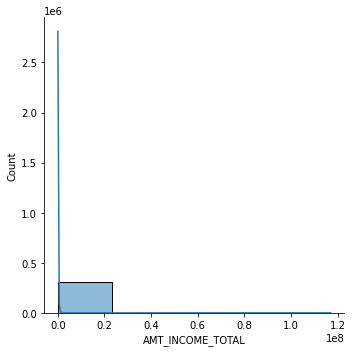

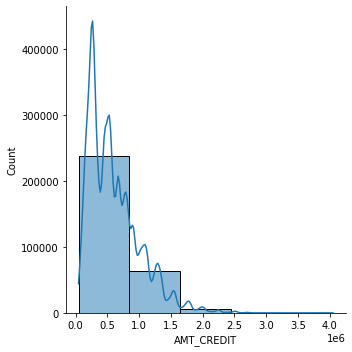

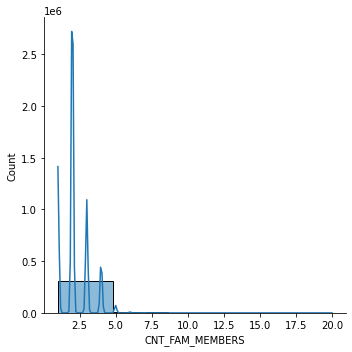

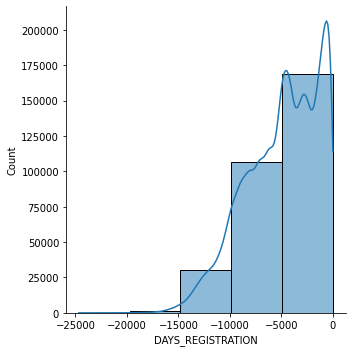

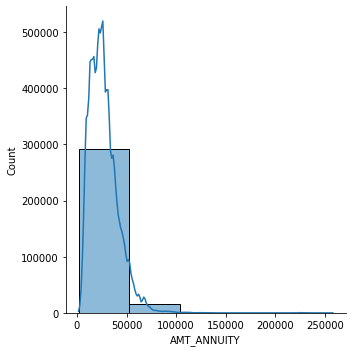

In [ ]:
for col in df_dist.columns:
  sns.displot(df_dist[col], bins= 5, kde= True)

plt.show

**Inferences:**

**AMT_INCOME_TOTAl:** Majority of the total annual income of lenders are falling in the first 1/5th of the range.

**AMT_CREDIT:** The credit lending range predominantly lies in the first half of the range making it obvious that most lenders are having low amounts of credits compared to the smaller section in the right. We shall classify these lenders later below.

**CNT_FAM_MEMBERS:** This is purely a right skewed feature. Since, most of the families will have upto 5 members, this is expected.

**DAYS_REGISTRATION:** This is a left skewed data (negative)

**AMT_ANNUITY:** This a right skewed data, which means most of the loans have a small annuity amounts.

Some additional inferences we noticed

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


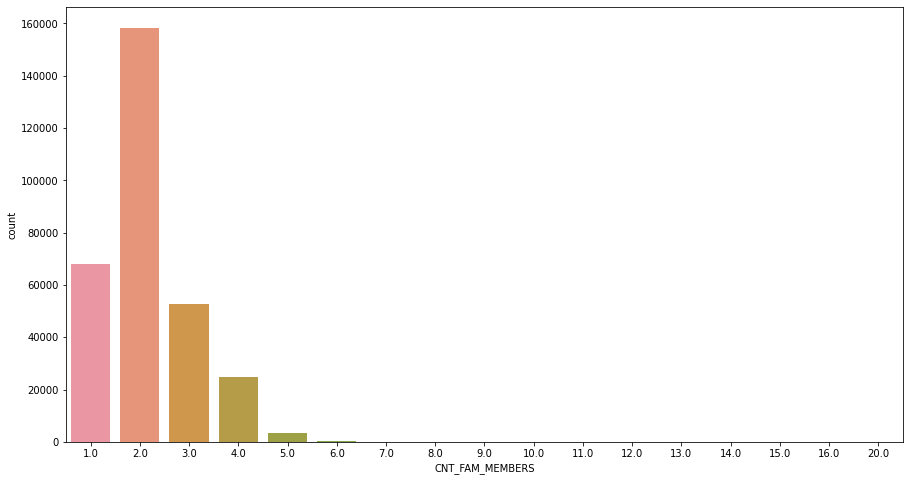

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(application_train['CNT_FAM_MEMBERS'])
plt.show()

The above charts gives us an idea of how many of the lenders have family members which mostly end up in 4. However, it is not a clear indication of target group. We shall explore further.

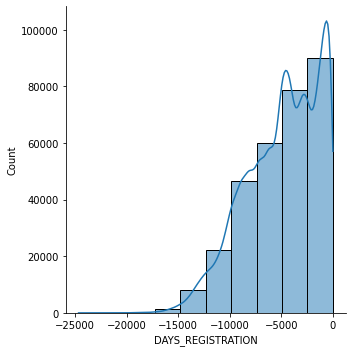

In [ ]:
sns.displot(application_train['DAYS_REGISTRATION'], bins= 10, kde= True)
plt.show()

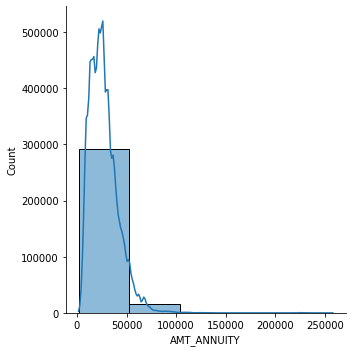

In [ ]:
sns.displot(application_train['AMT_ANNUITY'], bins= 5, kde= True)
plt.show()

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

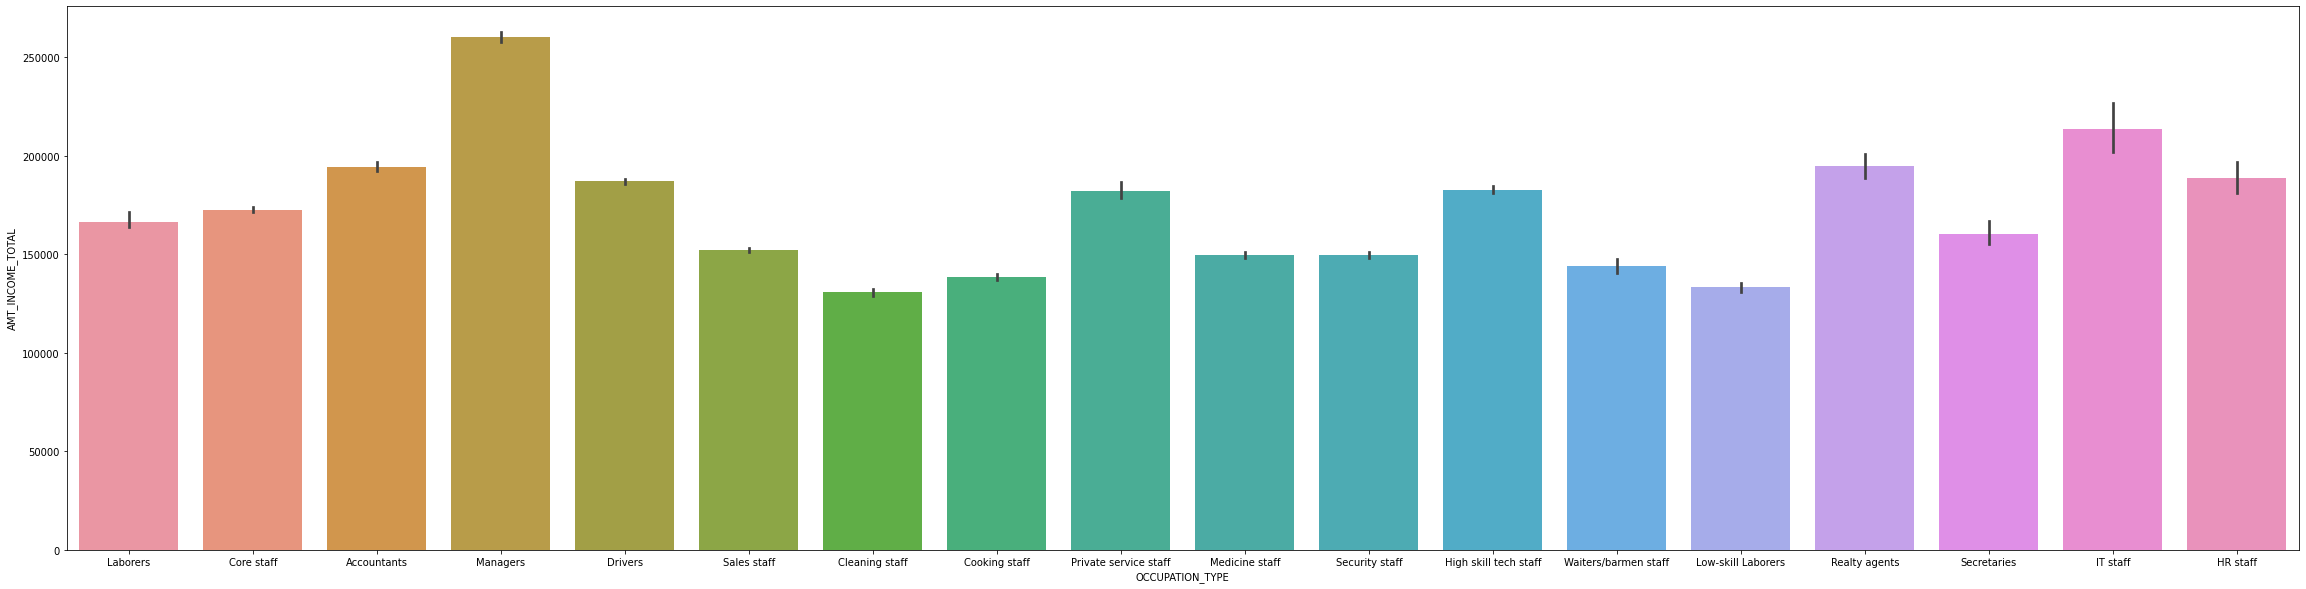

In [ ]:
plt.figure(figsize=(40,10))
sns.barplot(x="OCCUPATION_TYPE", y="AMT_INCOME_TOTAL", data=application_train)

Managers, IT Staff, Accountants, high skill tech staff are the ones which high wages according to the dataset

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='AMT_CREDIT'>

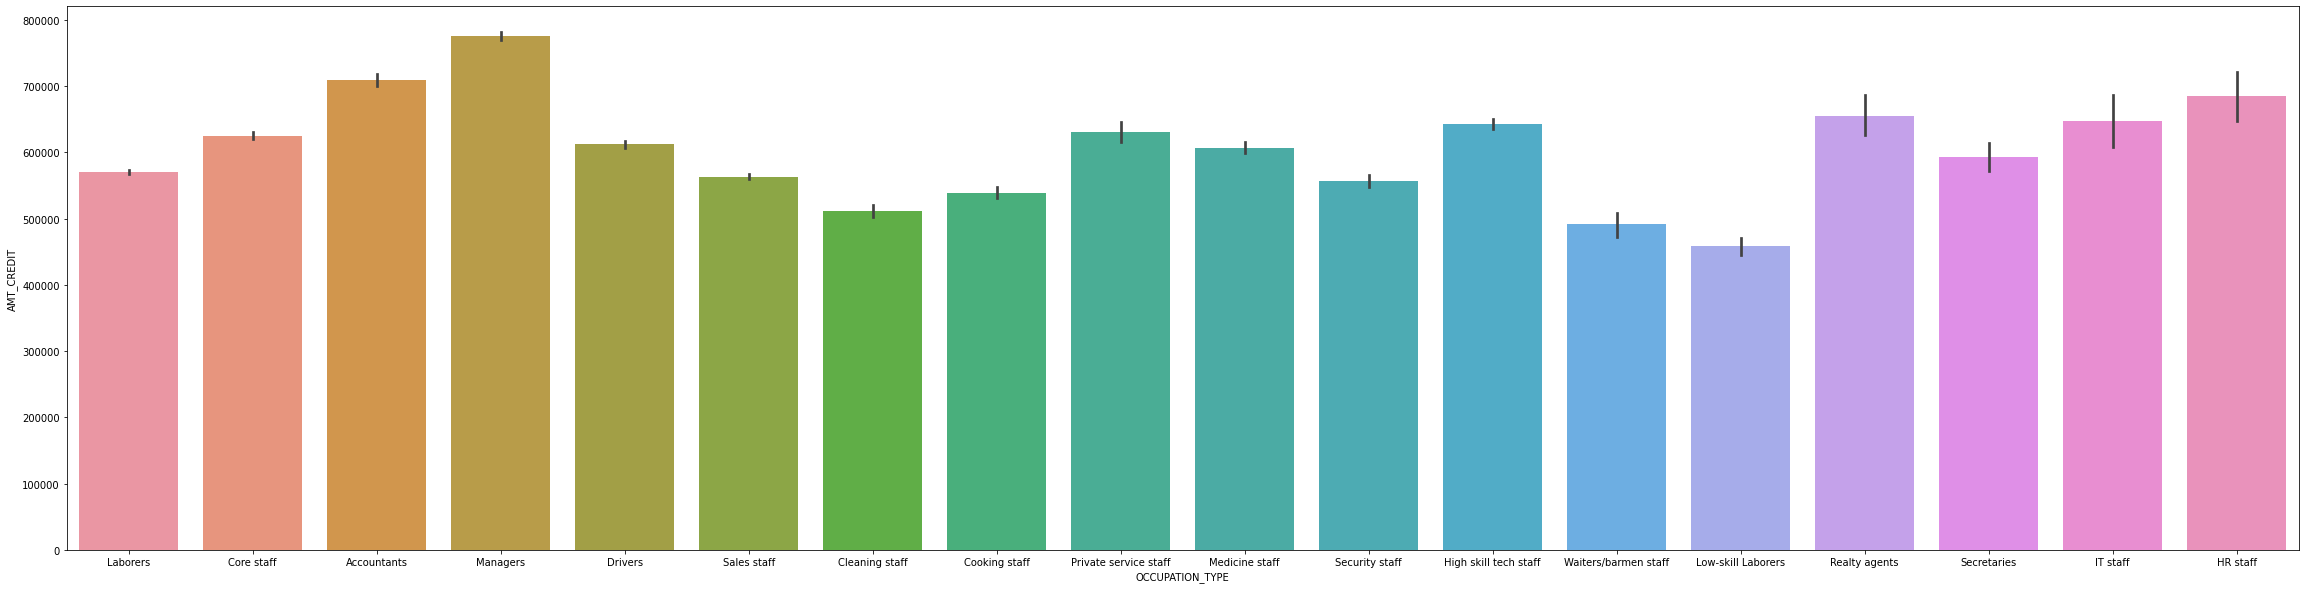

In [ ]:
plt.figure(figsize=(40,10))
sns.barplot(x="OCCUPATION_TYPE", y="AMT_CREDIT", data=application_train)

Turns out, the high income group end up taking credit. This shows good enough evidence to start off with a target group for approaching for more credit.

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

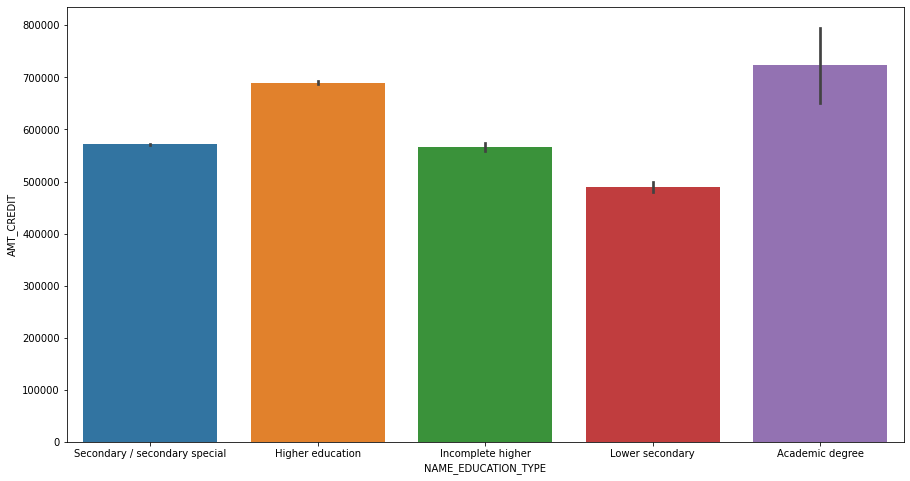

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", data=application_train)

People who have higher education tend to take up credits for cars and houses and other day to day expenses since they tend to expand lifestyles.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

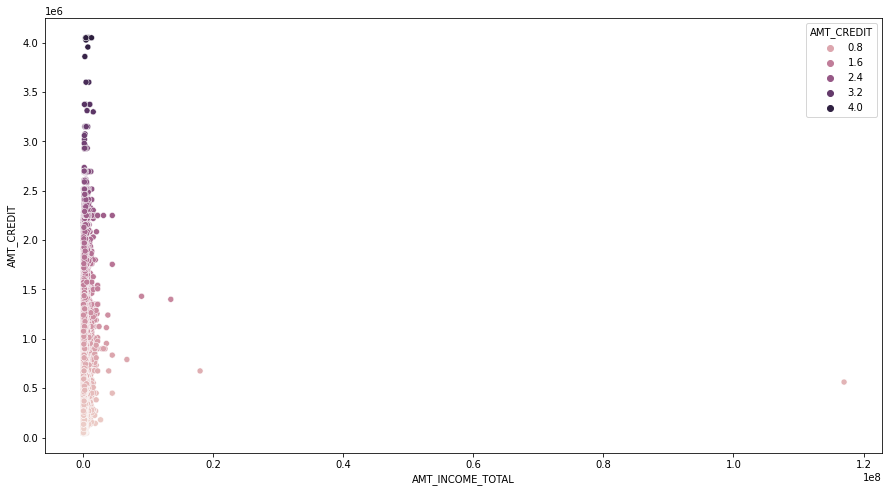

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=application_train, hue="AMT_CREDIT")

There looks to be a clear ourlier which does not show the scatter plot correctly. However, we can still see some sweet spots where lower and higher income groups are taking lwer and higher credit respectively.

**Relationship with the target variable**

In [ ]:
df_num5 = application_train[['TARGET', 'AMT_INCOME_TOTAL','AMT_CREDIT','CNT_FAM_MEMBERS','DAYS_REGISTRATION','AMT_ANNUITY']]
df_num5.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,DAYS_REGISTRATION,AMT_ANNUITY
0,1,202500.0,406597.5,1.0,-3648.0,24700.5
1,0,270000.0,1293502.5,2.0,-1186.0,35698.5
2,0,67500.0,135000.0,1.0,-4260.0,6750.0
3,0,135000.0,312682.5,2.0,-9833.0,29686.5
4,0,121500.0,513000.0,1.0,-4311.0,21865.5


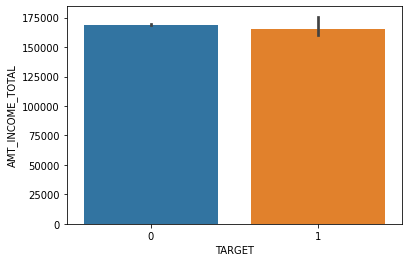

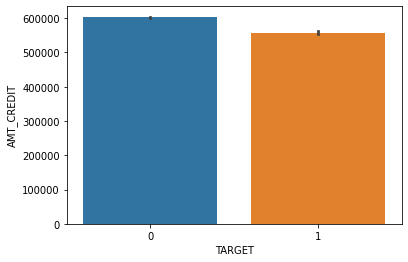

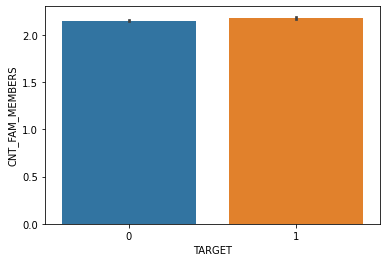

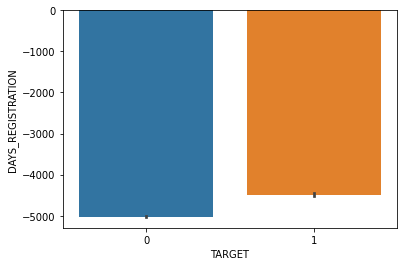

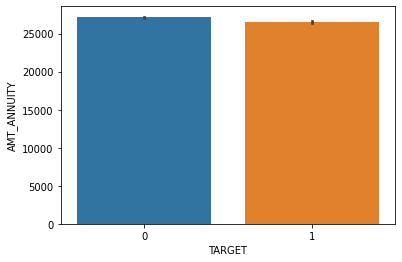

In [ ]:
for col in df_num5.columns:
  if col!=  'TARGET':
    sns.barplot(x = 'TARGET', y = col, data = df_num5)
    plt.show()

**Outliers**

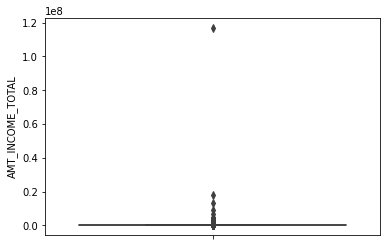

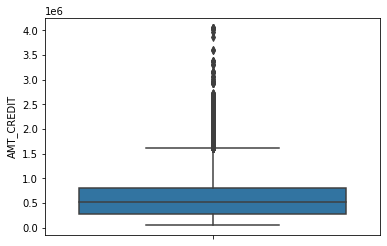

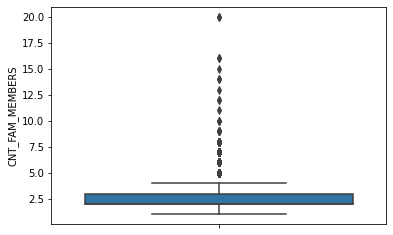

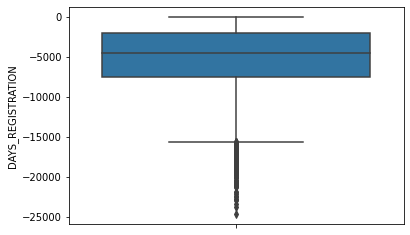

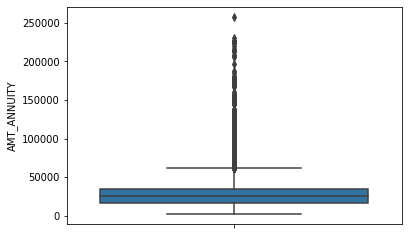

In [ ]:
for column in df_num5.columns:
    if column != "TARGET":
        sns.boxplot(y=df_num5[column])
        plt.show()

**Inference:** Looks like all 5 columns do have outliers in the data

### **Question 5:** If skewed, perform suitable transformations on these five numerical variables. Check the relationship of each of these numeric variables with the target variable using bar charts.  Visualize the relationship between each of these numeric variables and the target variable. Also, comment on the presence of outliers on each variable.

**Filter only numerical variables**

In [ ]:
df=application_train.select_dtypes(['float64','int64'])
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307511, 106)

Checking skewness and Performing transformations on the numerical variables with ~zero nulls

**Colummns with ~zero nulls**

In [ ]:
df_num=pd.DataFrame(df.isnull().sum()* 100/ len(df))
df_num.head(10)

,0
SK_ID_CURR,0.000000
TARGET,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902
AMT_GOODS_PRICE,0.090403
REGION_POPULATION_RELATIVE,0.000000
DAYS_BIRTH,0.000000
DAYS_EMPLOYED,0.000000


In [ ]:
df_num.reset_index(inplace=True)

In [ ]:
df_num

,index,0
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,CNT_CHILDREN,0.000000
3,AMT_INCOME_TOTAL,0.000000
4,AMT_CREDIT,0.000000
...,...,...
101,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
102,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
103,AMT_REQ_CREDIT_BUREAU_MON,13.501631
104,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [ ]:
df_num.columns=['numerical_col','nulls' ]

**Top 5 numerical variables considered for analysis**

In [ ]:
df_non_null= df_num[df_num['nulls'] <= 1].sort_values(by= 'nulls')
df_non_null1=df_non_null[df_non_null['nulls']==0]
df_non_null1

,numerical_col,nulls
0,SK_ID_CURR,0.0
98,FLAG_DOCUMENT_20,0.0
28,LIVE_CITY_NOT_WORK_CITY,0.0
80,FLAG_DOCUMENT_2,0.0
81,FLAG_DOCUMENT_3,0.0
82,FLAG_DOCUMENT_4,0.0
83,FLAG_DOCUMENT_5,0.0
84,FLAG_DOCUMENT_6,0.0
85,FLAG_DOCUMENT_7,0.0
86,FLAG_DOCUMENT_8,0.0


In [ ]:
df_num1= application_train[['AMT_INCOME_TOTAL','AMT_CREDIT','CNT_FAM_MEMBERS','DAYS_REGISTRATION','AMT_ANNUITY']]
df_num1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,DAYS_REGISTRATION,AMT_ANNUITY
0,202500.0,406597.5,1.0,-3648.0,24700.5
1,270000.0,1293502.5,2.0,-1186.0,35698.5
2,67500.0,135000.0,1.0,-4260.0,6750.0
3,135000.0,312682.5,2.0,-9833.0,29686.5
4,121500.0,513000.0,1.0,-4311.0,21865.5




**Histograms for the 5 numerical variables**



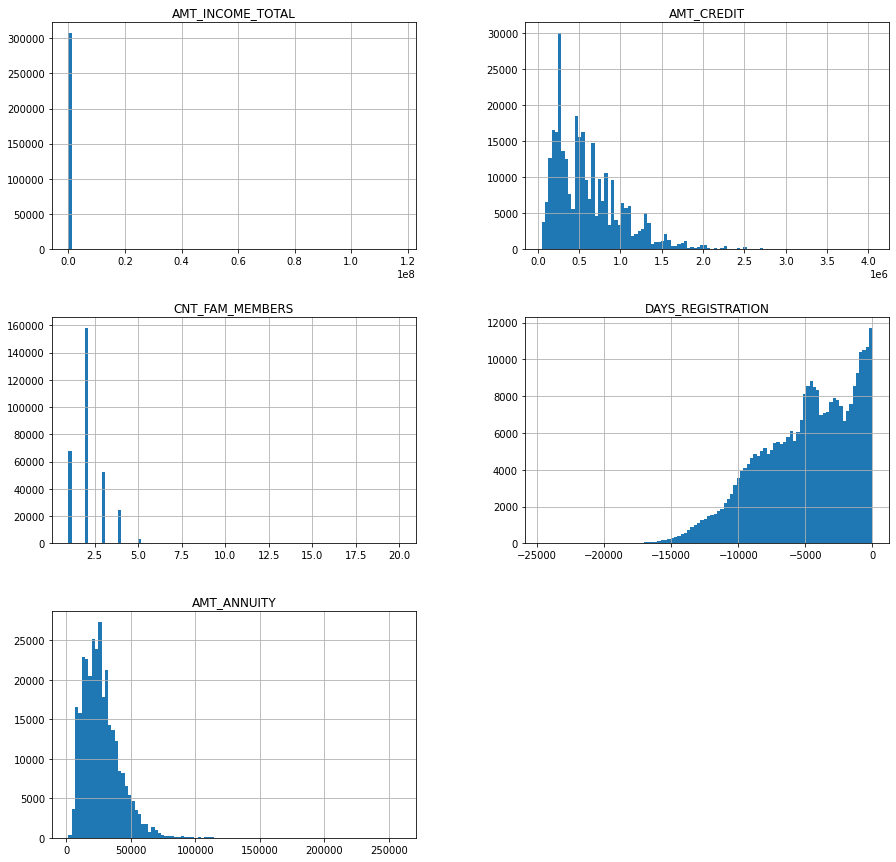

In [ ]:
df_num1.hist(bins=100, figsize=(15,15))
plt.show()

 **Right skewed**= 'AMT_INCOME_TOTAL',	'AMT_CREDIT	', 'AMT_ANNUITY' - LOG transformation
 
**Left skewed(negative)**= 'DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE' - YEO JOHNSON transformation




In [ ]:
right_skew_num = ['AMT_INCOME_TOTAL',	'AMT_CREDIT	', 'AMT_ANNUITY']
left_skew_num = ['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']

Create new Dataframe

In [ ]:
application_train_transformed= application_train.copy()
application_train_transformed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy import stats

 **Suitable transformations on each numercial variables**

AMT_INCOME_TOTAL variable

In [ ]:
application_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [ ]:
application_train['AMT_INCOME_TOTAL'].sort_values(ascending= False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
240137        26100.0
186643        26100.0
246104        26100.0
20727         25650.0
1678          25650.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [ ]:
application_train[application_train['AMT_INCOME_TOTAL']<= 18000090.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

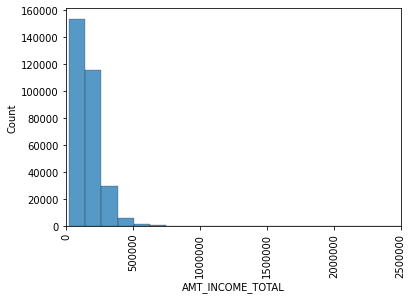

In [ ]:
sns.histplot(data=application_train[application_train['AMT_INCOME_TOTAL']<= 18000090.0], x='AMT_INCOME_TOTAL', bins= 150)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,2500000)
plt.xticks(rotation =90)
plt.show()

 **After LOG transformation**

In [ ]:
log_data= np.log(application_train['AMT_INCOME_TOTAL'])

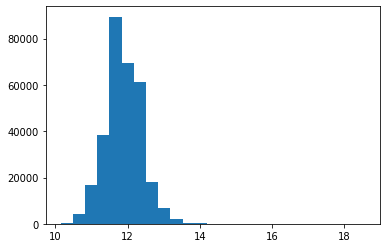

In [ ]:
plt.hist(x=log_data, bins=25)
plt.show()

In [ ]:
application_train_transformed['AMT_INCOME_TOTAL']= application_train_transformed['SK_ID_CURR'].map(log_data)

'AMT_CREDIT' variable

In [ ]:
application_train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

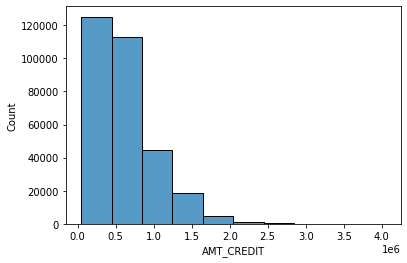

In [ ]:
sns.histplot(data=application_train, x='AMT_CREDIT', bins= 10)
plt.autoscale(False)
plt.show()

In [ ]:
log_data1= np.log(application_train['AMT_CREDIT'])

 **After Log transformation**

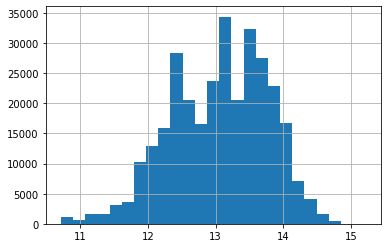

In [ ]:
log_data1.hist(bins=25)
plt.show()

In [ ]:

application_train_transformed['AMT_CREDIT']= application_train_transformed['SK_ID_CURR'].map(log_data1)

AMT_ANNUITY Variable

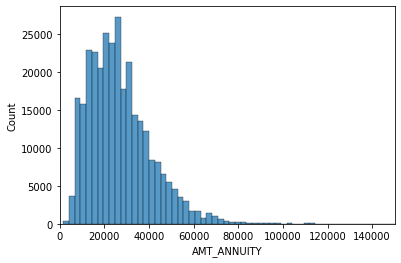

In [ ]:
sns.histplot(data=application_train, x='AMT_ANNUITY', bins= 100)
plt.autoscale(False)
plt.xlim(0, 150000)
plt.show()

In [ ]:
data_log2= np.log(application_train['AMT_ANNUITY'])
data_log2

0         10.114579
1         10.482864
2          8.817298
3         10.298448
4          9.992665
            ...    
307506    10.224048
307507     9.392787
307508    10.308252
307509     9.913685
307510    10.801971
Name: AMT_ANNUITY, Length: 307511, dtype: float64

In [ ]:
type(data_log2)

pandas.core.series.Series

***AFTER LOG transformation ***

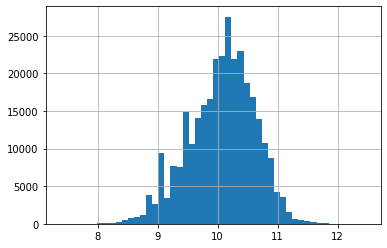

In [ ]:
data_log2.hist(bins=50)
plt.show()

In [ ]:
application_train_transformed['AMT_ANNUITY']= application_train_transformed['SK_ID_CURR'].map(data_log2)

CNT_FAM_MEMBERS variable

In [ ]:
application_train['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [ ]:
application_train['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

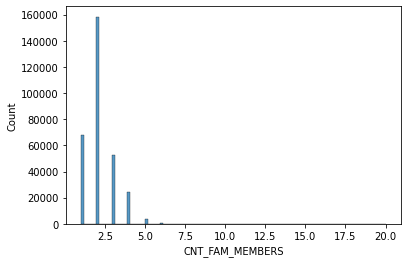

In [ ]:
sns.histplot(data=application_train, x='CNT_FAM_MEMBERS', bins= 100)
plt.autoscale(False)
plt.show()

In [ ]:
data_johnson, _ = stats.yeojohnson(application_train['CNT_FAM_MEMBERS'])

In [ ]:
data_john1= pd.Series(data_johnson)


In [ ]:
type(data_john1)

pandas.core.series.Series

In [ ]:
data_john4= pd.DataFrame(data_johnson)

***After Transformation ***

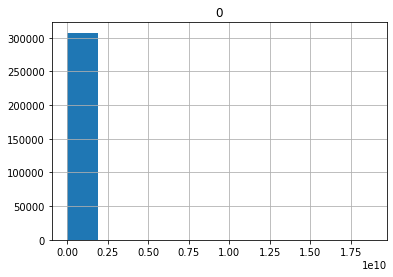

In [ ]:
data_john4.hist(bins=10)
plt.show()

In [ ]:
application_train_transformed['CNT_FAM_MEMBERS']= application_train_transformed['SK_ID_CURR'].map(data_john1)

DAYS_REGISTRATION variable

In [ ]:
application_train['DAYS_REGISTRATION'].value_counts()

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [ ]:
application_train['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

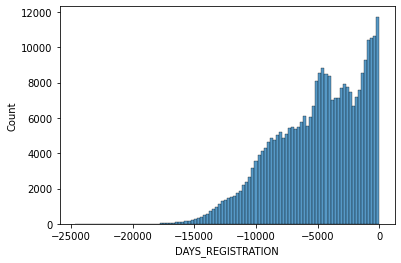

In [ ]:
sns.histplot(data=application_train, x='DAYS_REGISTRATION', bins= 100)
plt.autoscale(False)
plt.show()

In [ ]:
data_johnson, _ = stats.yeojohnson(application_train['DAYS_REGISTRATION'])

In [ ]:
data_john= pd.Series(data_johnson)

In [ ]:
data_john5= pd.DataFrame(data_johnson)

**AFTER transformation **

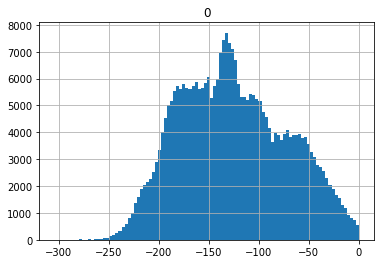

In [ ]:
data_john5.hist(bins=100)
plt.show()

In [ ]:
application_train_transformed['CNT_FAM_MEMBERS']= application_train_transformed['SK_ID_CURR'].map(data_john)

**New Dataframe after transformations of variables**

In [ ]:
application_train_transformed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,11.630709,12.582397,10.064330,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,11.630709,13.635642,10.601361,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,11.630709,13.547972,10.386608,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,12.022751,13.710150,10.182879,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,11.585251,12.609035,9.015055,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_df= application_train_transformed.copy()
df_graph=df_df[['DAYS_REGISTRATION','TARGET','CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']]

 **BOX PLOTS For OUTLIERS DETECTION**

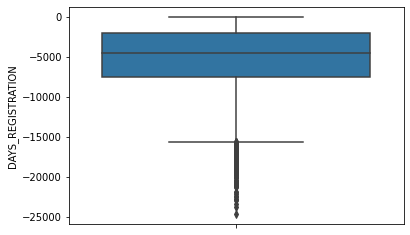

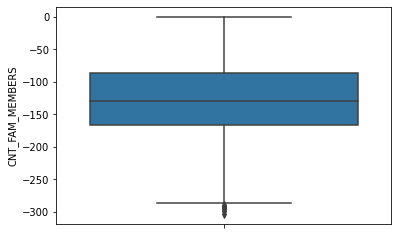

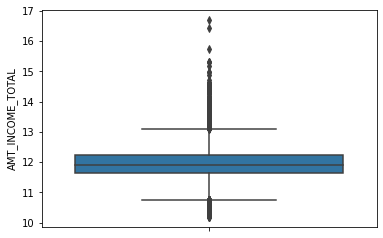

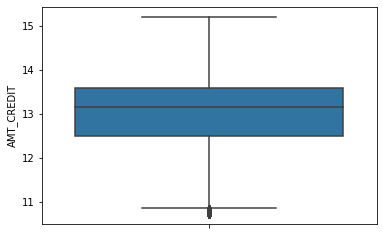

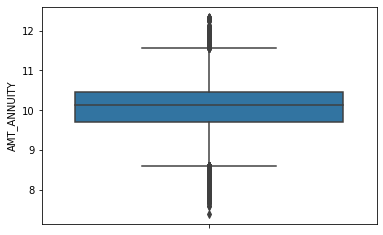

In [ ]:
for column in df_graph.columns:
    if df_graph[column].dtype != "object" and column != "TARGET":
        sns.boxplot(y=df_graph[column])
        plt.show()

**Relationship with target**

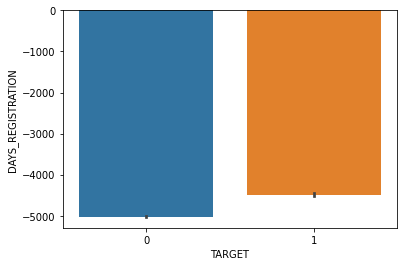

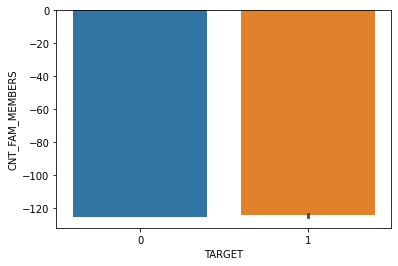

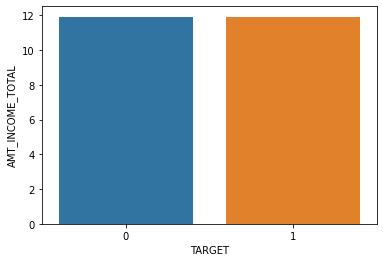

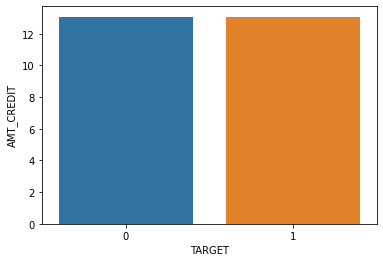

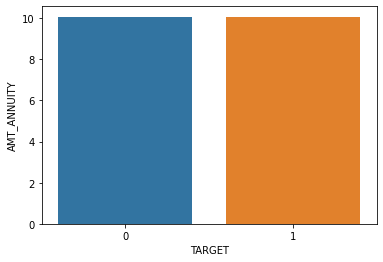

In [ ]:
for column in df_graph.columns:
  if column!= 'TARGET':
    sns.barplot(x='TARGET', y=column, data= df_graph)
    plt.show()

**Inference:** After transformations, the data seems to be more generalized between both the variables in the target feature, which is to be expected

### **Question 6**: Check cardinality and rare values of at least five categorical features. Discuss whether each of them is ordinal or nominal. Discuss the suitable methods for encoding each of them.

In [ ]:
#Getting the list of all categorical columns
cat_vars = [var for var in application_train.columns if application_train[var].dtype == 'O']
cat_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
len(cat_vars)

16

In [ ]:
application_train[cat_vars].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [ ]:
for column in application_train[cat_vars]:
  unique_values = application_train[cat_vars][column].unique()
  print(f"Unique values in {column}: {unique_values}")

Unique values in NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Unique values in CODE_GENDER: ['M' 'F' 'XNA']
Unique values in FLAG_OWN_CAR: ['N' 'Y']
Unique values in FLAG_OWN_REALTY: ['Y' 'N']
Unique values in NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unique values in NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Unique values in NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Unique values in NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Unique values in OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Dri

In [ ]:
# Calculating the percentage of null values
for col in application_train[cat_vars].columns:
    null_percentage = application_train[col].isnull().sum() / len(application_train[cat_vars]) * 100
    print(f"{col}: {null_percentage:.2f}% null values")

NAME_CONTRACT_TYPE: 0.00% null values
CODE_GENDER: 0.00% null values
FLAG_OWN_CAR: 0.00% null values
FLAG_OWN_REALTY: 0.00% null values
NAME_TYPE_SUITE: 0.42% null values
NAME_INCOME_TYPE: 0.00% null values
NAME_EDUCATION_TYPE: 0.00% null values
NAME_FAMILY_STATUS: 0.00% null values
NAME_HOUSING_TYPE: 0.00% null values
OCCUPATION_TYPE: 31.35% null values
WEEKDAY_APPR_PROCESS_START: 0.00% null values
ORGANIZATION_TYPE: 0.00% null values
FONDKAPREMONT_MODE: 68.39% null values
HOUSETYPE_MODE: 50.18% null values
WALLSMATERIAL_MODE: 50.84% null values
EMERGENCYSTATE_MODE: 47.40% null values


Some columns are having more than 50% null values, it would be better if we remove these columns from our analysis. Hence, getting the list of all such columns

In [ ]:
cat_vars_na50 = [i for i in application_train[cat_vars].columns if (application_train[i].isnull().sum() / len(application_train[cat_vars]) * 100) > 50]
cat_vars_na50

['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']

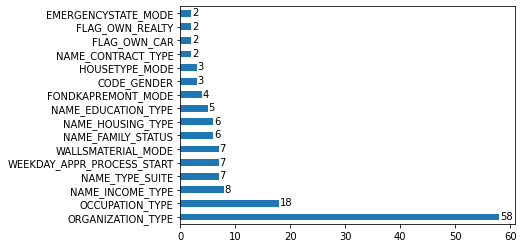

In [ ]:
#Cardinality - checking the number of unique values in each categorical column

chart = application_train[cat_vars].nunique().sort_values(ascending=False).plot.barh()

for i in chart.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, str(round(i.get_width(), 2)))

plt.show()

In [ ]:
application_train[cat_vars].nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
#Rare labels

def analyse_rare_labels(data, var, rare_perc):
    data = data.copy()

    # determine the % of observations per category
    data_temp = data.groupby(var)['TARGET'].count() / len(application_train)

    # return categories that are rare
    return data_temp[data_temp < rare_perc]

# print categories that are present in less than
# 10 % of the observations

for var in cat_vars:
    print(analyse_rare_labels(application_train, var, 0.01))
    print("---"* 50)

Series([], Name: TARGET, dtype: float64)
------------------------------------------------------------------------------------------------------------------------------------------------------
CODE_GENDER
XNA    0.000013
Name: TARGET, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
Series([], Name: TARGET, dtype: float64)
------------------------------------------------------------------------------------------------------------------------------------------------------
Series([], Name: TARGET, dtype: float64)
------------------------------------------------------------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE
Group of people    0.000881
Other_A            0.002816
Other_B            0.005756
Name: TARGET, dtype: float64
---------------------------------------------------------------------------------------

In [ ]:
rare_cat_vars = [i for i in application_train[cat_vars] if application_train[i].nunique() > len(application_train)*0.01]
rare_cat_vars

[]

**Rare labels - inference**

Some of the categorical variables show multiple labels that are present in less than 1% of the houses, especially in the case of organization_type

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. We should ideally remove them in order to prevent the over fitting case

**Encoding - inference**

'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'HOUSETYPE_MODE ', 'CODE_GENDER'  can be ordinally encoded as 
they have only binary outcome values 

Rest all columns should be one hot encoded given the nature of the columns

But, given the size of the dataset and the number of columns this can end up talking lot of memory

In [ ]:
ord_cat_vars = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'HOUSETYPE_MODE ', 'CODE_GENDER']
nom_cat_vars = [vars for vars in cat_vars if vars not in ord_cat_vars]

In [ ]:
nom_cat_vars

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
cat_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# Identify the target variable and categorical features
target_col = 'TARGET'
cat_cols = [col for col in application_train.columns if application_train[col].dtype == 'object']

chi2_scores = []
p_values = []

# Perform chi-square tests for each categorical feature
for col in cat_cols:
    contingency_table = pd.crosstab(application_train[target_col], application_train[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
    print('Chi-square test for', col)
    print('Chi-square statistic:', chi2)
    print('P-value:', p)


Chi-square test for NAME_CONTRACT_TYPE
Chi-square statistic: 293.15054219964554
P-value: 1.0235150721172847e-65
Chi-square test for CODE_GENDER
Chi-square statistic: 920.7913340361749
P-value: 1.1290217848908289e-200
Chi-square test for FLAG_OWN_CAR
Chi-square statistic: 146.65601825576024
P-value: 9.330994431109667e-34
Chi-square test for FLAG_OWN_REALTY
Chi-square statistic: 11.575827298084178
P-value: 0.0006681470317545887
Chi-square test for NAME_TYPE_SUITE
Chi-square statistic: 32.825314655829914
P-value: 1.1329313903575907e-05
Chi-square test for NAME_INCOME_TYPE
Chi-square statistic: 1253.4708080924988
P-value: 1.9281456056858933e-266
Chi-square test for NAME_EDUCATION_TYPE
Chi-square statistic: 1019.2131873088356
P-value: 2.4476812052198174e-219
Chi-square test for NAME_FAMILY_STATUS
Chi-square statistic: 504.69408255632106
P-value: 7.744841561414258e-107
Chi-square test for NAME_HOUSING_TYPE
Chi-square statistic: 420.55618983894664
P-value: 1.0990890032617707e-88
Chi-square te

### **Question 7**: Use previous_application.csv, to get the count of the number of previous applications for each SK_ID_CURR; merge this information in the application_train.csv and as a ‘num_prev_app’ new feature.

In [ ]:
previous_application = pd.read_csv('/content/drive/MyDrive/DS-EDA/data/previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previous_application['SK_ID_PREV'].nunique()

1670214

In [ ]:
previous_application['SK_ID_CURR'].nunique()

338857

In [ ]:
count_of_prev_applications = previous_application.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
count_of_prev_applications

SK_ID_CURR
100001    1
100002    1
100003    3
100004    1
100005    2
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: SK_ID_PREV, Length: 338857, dtype: int64

In [ ]:
previous_application['count_of_prev_applications'] = previous_application['SK_ID_CURR'].map(count_of_prev_applications)
previous_application.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,count_of_prev_applications
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,4
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,23
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,25


In [ ]:
application_train = pd.merge(application_train, count_of_prev_applications, on='SK_ID_CURR', how = 'left')
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


###**Question 8**: Generate at least five new features using files other than application_train.csv and, and merge them into these application tables similar to the previous question. Justify the reason for selecting these new features and the method of aggregation (sum, mean, min, max, first, last,...)

**installment_payments File**

In [ ]:
installments = pd.read_csv('/content/drive/MyDrive/DS-EDA/data/installments_payments.csv')

In [ ]:
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


Calculating the number of days an installment payment is delayed

In [ ]:
installments['Delayed_days'] = installments['DAYS_ENTRY_PAYMENT']-installments['DAYS_INSTALMENT']
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Delayed_days
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,-7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,-8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0
...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN,NaN


Replacing Null values in delayed days column because it means the payment has never been done and hence the number of delayed days will be the same as the number of days the installment was supposed to be paid

In [ ]:
installments['Delayed_days'] = installments['Delayed_days'].fillna(installments['DAYS_INSTALMENT'])
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Delayed_days
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,-7.0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,-8.0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0
...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN,-1624.0
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN,-1539.0
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN,-7.0
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN,-1986.0


Calculating the average days an applicant delays his payment

In [ ]:
avg_delayed_days = installments.groupby('SK_ID_CURR')['Delayed_days'].mean()
avg_delayed_days

SK_ID_CURR
100001    -7.285714
100002   -20.421053
100003    -7.160000
100004    -7.666667
100005   -23.555556
            ...    
456251   -36.285714
456252    -2.833333
456253   -14.500000
456254   -19.000000
456255    -8.067568
Name: Delayed_days, Length: 339587, dtype: float64

In [ ]:
installments['Avg_Delayed_Days'] = installments['SK_ID_CURR'].map(avg_delayed_days)
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,Delayed_days,Avg_Delayed_Days
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,-7.0,-10.900990
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,-3.056962
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,5.333333
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,-8.0,0.666667
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0,-7.800000
...,...,...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN,-1624.0,-71.407767
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN,-1539.0,-94.960000
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN,-7.0,-9.231884
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN,-1986.0,-125.905660


Merging the Data back to the application_train data

In [ ]:
application_train = pd.merge(application_train, avg_delayed_days, on='SK_ID_CURR', how = 'left')

 **Bureau File**

In [ ]:
bureau= pd.read_csv('/content/drive/MyDrive/DS-EDA/data/bureau.csv')

In [ ]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
mean=bureau['AMT_CREDIT_SUM'].mean()

In [ ]:
bureau['AMT_CREDIT_SUM'].fillna(value=mean, inplace=True)

In [ ]:
bureau.dropna( axis=1, inplace=True)

Total amount credit is the sum of credit amount and credit amount over due which is the total credit amount to be paid by a person.

In [ ]:
bureau['TOTAL_AMT_CREDIT']= bureau['AMT_CREDIT_SUM']+ bureau['AMT_CREDIT_SUM_OVERDUE']

In [ ]:
bureau2= bureau[['SK_ID_CURR','AMT_CREDIT_SUM','AMT_CREDIT_SUM_OVERDUE','TOTAL_AMT_CREDIT']]

In [ ]:
bureau2.head()

,SK_ID_CURR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,TOTAL_AMT_CREDIT
0,215354,91323.0,0.0,91323.0
1,215354,225000.0,0.0,225000.0
2,215354,464323.5,0.0,464323.5
3,215354,90000.0,0.0,90000.0
4,215354,2700000.0,0.0,2700000.0


SUM Total amount credit is the sum of total credit amount to be paid by a person(each id).

In [ ]:
SUM_TOTAL_AMT_CREDIT= bureau2.groupby('SK_ID_CURR')['TOTAL_AMT_CREDIT'].sum()
SUM_TOTAL_AMT_CREDIT

SK_ID_CURR
100001    1453365.000
100002     865055.565
100003    1017400.500
100004     189037.800
100005     657126.000
             ...     
456249    3693858.660
456250    3086459.550
456253    3960000.000
456254      45000.000
456255    3801919.500
Name: TOTAL_AMT_CREDIT, Length: 305811, dtype: float64

In [ ]:
AVG_TOTAL_AMT_CREDIT= bureau2.groupby('SK_ID_CURR')['TOTAL_AMT_CREDIT'].mean()
AVG_TOTAL_AMT_CREDIT

SK_ID_CURR
100001    2.076236e+05
100002    1.081319e+05
100003    2.543501e+05
100004    9.451890e+04
100005    2.190420e+05
              ...     
456249    2.841430e+05
456250    1.028820e+06
456253    9.900000e+05
456254    4.500000e+04
456255    3.456290e+05
Name: TOTAL_AMT_CREDIT, Length: 305811, dtype: float64

In [ ]:
bureau2['SUM_TOTAL_AMT_CREDIT'] = bureau2['SK_ID_CURR'].map(SUM_TOTAL_AMT_CREDIT)
bureau2

<ipython-input-122-e1d864a0affd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bureau2['SUM_TOTAL_AMT_CREDIT'] = bureau2['SK_ID_CURR'].map(SUM_TOTAL_AMT_CREDIT)


,SK_ID_CURR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,TOTAL_AMT_CREDIT,SUM_TOTAL_AMT_CREDIT
0,215354,91323.00,0.0,91323.00,5973945.30
1,215354,225000.00,0.0,225000.00,5973945.30
2,215354,464323.50,0.0,464323.50,5973945.30
3,215354,90000.00,0.0,90000.00,5973945.30
4,215354,2700000.00,0.0,2700000.00,5973945.30
...,...,...,...,...,...
1716423,259355,11250.00,0.0,11250.00,131502.51
1716424,100044,38130.84,0.0,38130.84,2329694.46
1716425,100044,15570.00,0.0,15570.00,2329694.46
1716426,246829,36000.00,0.0,36000.00,1253731.50


In [ ]:
application_train = pd.merge(application_train, bureau2, on='SK_ID_CURR', how = 'left')

In [ ]:
application_train = pd.merge(application_train, AVG_TOTAL_AMT_CREDIT, on='SK_ID_CURR', how = 'left')

Credit Amount File

In [ ]:
credit_card_balance = pd.read_csv('/content/drive/MyDrive/DS-EDA/data/credit_card_balance.csv')
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
s=credit_card_balance[['SK_ID_CURR','AMT_PAYMENT_CURRENT','AMT_CREDIT_LIMIT_ACTUAL']].sort_values(by='AMT_CREDIT_LIMIT_ACTUAL')

In [ ]:
s.head(10)

,SK_ID_CURR,AMT_PAYMENT_CURRENT,AMT_CREDIT_LIMIT_ACTUAL
1973401,287846,425.655,0
578245,207084,NaN,0
578246,188099,NaN,0
578247,262196,NaN,0
578248,379357,NaN,0
578249,182630,NaN,0
1136235,288022,147.510,0
578251,383844,NaN,0
578252,386932,878.220,0
1136233,131441,0.000,0


In [ ]:
s[(s['AMT_CREDIT_LIMIT_ACTUAL']==0)]

,SK_ID_CURR,AMT_PAYMENT_CURRENT,AMT_CREDIT_LIMIT_ACTUAL
1973401,287846,425.655,0
578245,207084,NaN,0
578246,188099,NaN,0
578247,262196,NaN,0
578248,379357,NaN,0
...,...,...,...
3043210,133273,22.185,0
1285399,182748,0.000,0
366349,432775,NaN,0
1687424,150199,131.625,0


In [ ]:
credit_card_balance['Utilization'] = credit_card_balance['AMT_PAYMENT_CURRENT'] / credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL']
credit_card_balance['Utilization'] .replace([np.inf, -np.inf], np.nan, inplace=True)
credit_card_balance['avg_utilization'] = credit_card_balance.groupby('SK_ID_CURR')['Utilization'].mean()

In [ ]:
credit_card_avg_utilization = credit_card_balance.groupby('SK_ID_CURR')['Utilization'].mean()
credit_card_avg_utilization

SK_ID_CURR
100006         NaN
100011    0.027456
100013    0.046511
100021         NaN
100023         NaN
            ...   
456244    0.110301
456246    0.139098
456247    0.033192
456248         NaN
456250    0.060116
Name: Utilization, Length: 103558, dtype: float64

In [ ]:
filtered_df1 = credit_card_balance.loc[(credit_card_balance['SK_ID_CURR'].isin([186401])),
                                       ['SK_ID_CURR', 'avg_utilization']]
filtered_df1

,SK_ID_CURR,avg_utilization
10956,186401,NaN
40458,186401,NaN
78582,186401,NaN
138926,186401,NaN
157718,186401,NaN
...,...,...
3755437,186401,NaN
3782341,186401,NaN
3813465,186401,NaN
3823260,186401,NaN


In [ ]:
application_train = pd.merge(application_train,credit_card_avg_utilization , on='SK_ID_CURR', how = 'left')

**POS_CASH File**

In [ ]:
POS_CASH_balance = pd.read_csv('/content/drive/My Drive/DS-EDA/data/POS_CASH_balance.csv')
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
POS_CASH_balance.drop_duplicates(inplace=True)

In [ ]:
POS_CASH_balance['MONTHS_BALANCE'] = pd.to_datetime(POS_CASH_balance['MONTHS_BALANCE'], format='%Y%m', errors='coerce')

In [ ]:
POS_CASH_balance['NAME_CONTRACT_STATUS'] = POS_CASH_balance['NAME_CONTRACT_STATUS'].replace({
    'Active': 0,
    'Signed': 1,
    'Demand': 2,
    'Returned to the store': 3,
    'Approved': 4,
    'Amortized debt': 5,
    'Canceled': 6,
    'XNA': 7
})

In [ ]:
POS_CASH_balance.loc[POS_CASH_balance['CNT_INSTALMENT_FUTURE'] > POS_CASH_balance['CNT_INSTALMENT'], 'CNT_INSTALMENT_FUTURE'] = np.nan

**max_dpd** is the maximum number of days past due for each customer. This would give us an idea of the worst-case scenario in terms of how many days late a customer's payment might be. We are calculating this feature by using max() function.

In [ ]:
max_dpd = POS_CASH_balance.groupby('SK_ID_CURR')['SK_DPD'].max().reset_index()
max_dpd.columns = ['SK_ID_CURR', 'MAX_DPD']
max_dpd.head(10)

,SK_ID_CURR,MAX_DPD
0,100001,7
1,100002,0
2,100003,0
3,100004,0
4,100005,0
5,100006,0
6,100007,0
7,100008,1294
8,100009,0
9,100010,0


In [ ]:
application_train = pd.merge(application_train, max_dpd, on='SK_ID_CURR', how='left')

The five features generated are: 

1. **SUM Total amount credit:** Is the sum of total credit amount to be paid by a person(each id).

2. **Avg Delayed Days**:The average number of days an installment payment is delayed

3. **Max_dpd:** is the maximum number of days past due for each customer. This would give us an idea of the worst-case scenario in terms of how many days late a customer's payment might be. We are calculating this feature by using max() function.

4. **Credit_Card_Avg_Utlization:** People with higher utilization might require loans and paired with payment details they can be assessed whether to give a loan or not

5. **AVG Total amount credit:** Is the average credit amount to be paid by a person(each id).

In [ ]:
application_train.to_csv('app_new.csv', index=False)

### **Question 9:** Handle NaNs. State in your notebook how you dealt with the NaN values with a justification backing the approach taken to deal with NaNs.

For columnns with greater than 50% Null Values: Our approach is to drop them

For numerical Null value columns: We are trying median imputation as our primary approach

For categorical Null value features: We are imouting them with most frequent values as our primary batch

In [ ]:
application_train = application_train.drop(cat_vars_na50, axis = 1)

KeyError: ignored

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, distance=1.5):
        self.distance = distance
        self.output_dataframe = False  # add output_dataframe attribute

    def set_output(self, transform):
        if transform == "pandas":
            self.output_dataframe = True

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        numeric_cols = X.select_dtypes(include=np.number).columns
        for col in numeric_cols:
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1
            upper_cap = q3 + self.distance * iqr
            lower_cap = q1 - self.distance * iqr
            X[col] = np.where(X[col] > upper_cap, upper_cap, X[col])
            X[col] = np.where(X[col] < lower_cap, lower_cap, X[col])

        if self.output_dataframe:  # check if output_dataframe attribute is True
            X = pd.DataFrame(X, columns=numeric_cols)
        return X

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Defining a function to apply the log transformation
def log_transform(X):
    return np.log(X)

In [ ]:
!pip install -U feature-engine
from feature_engine.encoding import RareLabelEncoder

In [ ]:
# pipeline for left skewed numeric columns 
left_skew_pipeline  = Pipeline(steps=[('skewness', PowerTransformer(method='yeo-johnson'))])

# pipeline for right skewed numeric columns 
right_skew_pipeline  = Pipeline(steps=[('log', FunctionTransformer(log_transform))])


# pipeline for numeric columns that need to be discretized 
num_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "median", add_indicator= True)),
                              ("disc", KBinsDiscretizer(strategy= "equal_width", encode = "ordinal"))]) 


# pipeline for nominal categorical columns 
nom_cat_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "constant", fill_value = "missing")), 
                                 ("ohe", OneHotEncoder(sparse_output=False)),])  


# pipeline for ordinal categorical columns 
ord_cat_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "most_frequent", add_indicator = True)), 
                                 ("ord", OrdinalEncoder())])  


# pipeline for categorical columns that may have rare categories 
rare_cat_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "constant", fill_value = "rare")), ("rare", RareLabelEncoder(tol=0.05, n_categories=4)), ("ohe", OneHotEncoder(sparse_output=False))]) 

In [ ]:
nom_cat_vars = nom_cat_vars
ord_cat_vars = ord_cat_vars

rare_cat_vars = []
disc_num_vars = []

num_vars = num_col

left_skew_num = left_skew_num
right_skew_num = right_skew_num

date_vars = []

In [ ]:
preprocessor = ColumnTransformer(transformers = [("nom", nom_cat_pipe, nom_cat_vars),
                                                 ("ord", ord_cat_pipe, ord_cat_vars), 
                                                 ("rare", rare_cat_pipe, rare_cat_vars), 
                                                 ("norm", num_pipe, num_vars),
                                                 ("left_skew", left_skew_pipeline, left_skew_num),
                                                 ("right_skew", right_skew_pipeline, right_skew_num)], remainder = "passthrough")


preprocessor.set_output(transform = "pandas")

In [ ]:
preprocessor.fit(application_train)
application_train_processed = preprocessor.transform(application_train)

In [ ]:
application_train_processed.to_csv('transformed_data.csv', index=False)